Usando base de dados do [DATASUS TABNET](https://datasus.saude.gov.br/informacoes-de-saude-tabnet/) sobre [casos de Tuberculose](http://tabnet.datasus.gov.br/cgi/tabcgi.exe?sinannet/cnv/tubercbr.def).

In [ ]:
import pandas as pd
from datetime import datetime
import plotly.graph_objects as go
import plotly.express as px
import numpy as np
import time
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
url_tuberculose = 'https://raw.githubusercontent.com/LucasGabrielB/Alura-Bootcamp-Data-Science-Aplicada/main/Modulo-04/datasets/TUBERCULOSE%20-%20CASOS%20CONFIRMADOS%20NOTIFICADOS%20NO%20SISTEMA%20DE%20INFORMA%C3%87%C3%83O%20DE%20AGRAVOS%20DE%20NOTIFICA%C3%87%C3%83O%20-%20BRASIL.csv'

df_tuberculose = pd.read_csv(url_tuberculose, skiprows=3, skipfooter=17, sep=';', encoding='ISO-8859-1', engine='python')

df_tuberculose.head()

,Ano Diagnóstico,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez,Total
0,2001,8088,6542,8095,7305,7656,6805,6987,8065,6697,7524,6874,6627,87265
1,2002,8013,7346,7961,8771,7784,6713,7746,8330,7654,8200,7532,6809,92859
2,2003,8115,7985,7474,7975,8024,7082,7949,7585,8136,8521,7624,7303,93773
3,2004,7574,6743,8574,8089,7763,7314,7825,8232,7901,8016,7753,7196,92980
4,2005,7432,6748,8441,7958,8019,7781,7282,8391,7690,7186,7587,7541,92056


In [3]:
convert_months = {
    'Jan': 1,
    'Fev': 2,
    'Mar': 3,
    'Abr': 4,
    'Mai': 5,
    'Jun': 6,
    'Jul': 7,
    'Ago': 8,
    'Set': 9,
    'Out': 10,
    'Nov': 11,
    'Dez': 12,
}

In [4]:
# transformando o DataFrame em uma série temporal
df_tuberculose_ts = df_tuberculose.drop('Total', axis=1).melt(value_name='Casos', id_vars=['Ano Diagnóstico'], var_name='Mês')
df_tuberculose_ts['Data'] = df_tuberculose_ts.apply(lambda row: datetime(row['Ano Diagnóstico'], convert_months[row['Mês']], 1), axis=1)
df_tuberculose_ts.drop(['Ano Diagnóstico', 'Mês'], axis=1, inplace=True)
df_tuberculose_ts.sort_values('Data', inplace=True)
df_tuberculose_ts.index = df_tuberculose_ts['Data']
df_tuberculose_ts

,Casos,Data
Data,,
2001-01-01,8088,2001-01-01
2001-02-01,6542,2001-02-01
2001-03-01,8095,2001-03-01
2001-04-01,7305,2001-04-01
2001-05-01,7656,2001-05-01
...,...,...
2019-08-01,8239,2019-08-01
2019-09-01,8143,2019-09-01
2019-10-01,8592,2019-10-01


In [5]:
fig = go.Figure()

for year in range(2001, 2020):
    fig.add_trace(go.Scatter(name=str(year),
                            y=df_tuberculose_ts.query(f'Data.dt.year == {year}')['Casos'],
                            x=df_tuberculose_ts.query(f'Data.dt.year == {year}')['Data'].dt.month))

fig.update_traces(mode='markers+lines', hovertemplate=None)
fig.update_layout(
    hovermode='x',
    title={
        'text': 'Casos de Tuberculose ao longo dos anos no Brasil',
        'y': 0.9,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    yaxis_title='Número de casos',
    font={
        'family': 'Courier New, monospace',
        'size': 16
    },
    xaxis = {
        'tickmode': 'array',
        'tickvals':  list(convert_months.values()),
        'ticktext':  list(convert_months.keys())
    }
)

fig.show()

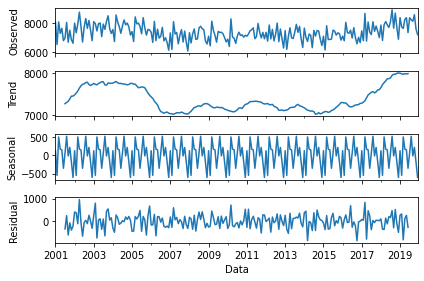

In [6]:
decompose = seasonal_decompose(df_tuberculose_ts['Casos'])

decompose.plot();

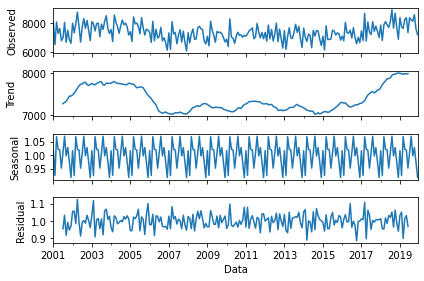

In [7]:
decompose = seasonal_decompose(df_tuberculose_ts['Casos'], model='multiplicative')

decompose.plot();

In [8]:
url_passengers = 'https://raw.githubusercontent.com/alura-cursos/serie_temporal_bootcamp/main/AirPassengers.csv'

df_passengers = pd.read_csv(url_passengers)
df_passengers['Month'] = pd.to_datetime(df_passengers['Month'])
df_passengers.rename({'Month': 'Date', '#Passengers': 'Passengers'}, axis=1, inplace=True)

df_passengers

,Date,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [9]:
px.line(data_frame=df_passengers,
        x='Date',
        y='Passengers',
        title='Numero de passageiros em voos de 1949 a 1960'
)

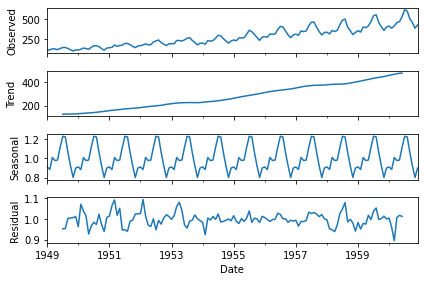

In [10]:
decompose_passengers = seasonal_decompose(df_passengers.set_index('Date'), model='multiplicative')

decompose_passengers.plot(); 

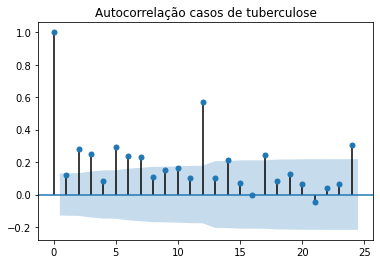

In [11]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df_tuberculose_ts['Casos'], title='Autocorrelação casos de tuberculose');

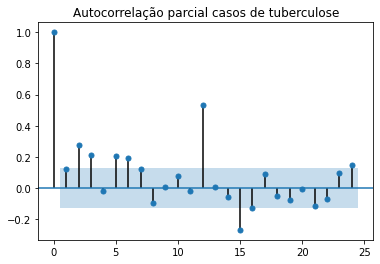

In [12]:
plot_pacf(df_tuberculose_ts['Casos'], title='Autocorrelação parcial casos de tuberculose');

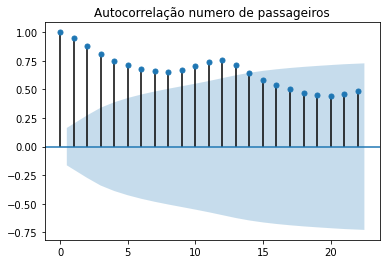

In [13]:
plot_acf(df_passengers['Passengers'], title='Autocorrelação numero de passageiros');

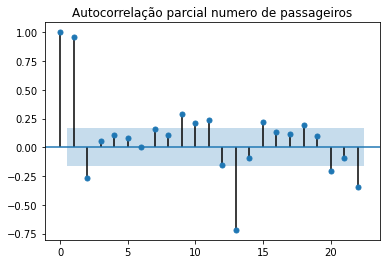

In [14]:
plot_pacf(df_passengers['Passengers'], title='Autocorrelação parcial numero de passageiros');

In [15]:
df_passengers['Month'] = df_passengers['Date'].dt.month
df_passengers['Year'] = df_passengers['Date'].dt.year

df_passengers.head()

,Date,Passengers,Month,Year
0,1949-01-01,112,1,1949
1,1949-02-01,118,2,1949
2,1949-03-01,132,3,1949
3,1949-04-01,129,4,1949
4,1949-05-01,121,5,1949


In [16]:
fig = go.Figure()

for year in range(df_passengers['Year'].min(), df_passengers['Year'].max()+1):
    fig.add_trace(go.Scatter(name=str(year),
                            y=df_passengers.query(f'Year == {year}')['Passengers'],
                            x=df_passengers.query(f'Year == {year}')['Month']))

fig.update_traces(mode='markers+lines', hovertemplate=None)
fig.update_layout(
    hovermode='x',
    title={
        'text': 'Numero de passageiros ao longo dos messes de 1949 a 1960',
        'y': 0.9,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    yaxis_title='Numero de passageiros',
    font={
        'family': 'Courier New, monospace',
        'size': 16
    },
    xaxis = {
        'tickmode': 'array',
        'tickvals':  list(convert_months.values()),
        'ticktext':  list(convert_months.keys())
    }
)

fig.show()

In [17]:
fig = px.line(decompose_passengers.seasonal[:12], y='Passengers')

fig.update_traces(mode='markers+lines', hovertemplate=None)
fig.update_layout(
    hovermode='y',
    title={
        'text': 'Sazonalidade de passageiros',
        'y': 1,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    yaxis_title='Sazonalidade',
)

fig.show()

In [18]:
from statsmodels.tsa.arima_model import ARIMA

train = df_tuberculose_ts.query('Data.dt.year != 2019')['Casos'].values.astype('float32')
test = df_tuberculose_ts.query('Data.dt.year == 2019')['Casos'].values.astype('float32')

arima_model = ARIMA(train, order=[12, 1, 1]).fit()

In [19]:
prediction = arima_model.forecast(12)[0]
prediction

array([8219.7204888 , 7182.8596713 , 8122.70040846, 8158.05765208,
       7767.27443377, 7971.23021777, 8009.13301846, 8546.09432374,
       7913.58385214, 8548.97401791, 7883.02735693, 7428.48251802])

In [20]:
test

array([8392., 7754., 7648., 8274., 8383., 7363., 8382., 8239., 8143.,
       8592., 7615., 7220.], dtype=float32)

In [21]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(
        y=test,
        name='Teste'
    )
)

fig.add_trace(go.Scatter(
        y=prediction,
        name='Previsão'
    )
)

fig.update_layout(
    title={'text': 'Previsão x Dados reais, para o numero de cassos de tuberculose em 2019.'}
)

fig.show()

In [22]:
train_passengers = df_passengers.query('Year != 1960')['Passengers'].values.astype('float32')
test_passengers = df_passengers.query('Year == 1960')['Passengers'].values.astype('float32')

arima_model_passengers = ARIMA(train_passengers, order=[2, 1, 2]).fit()

In [23]:
prediction_passengers = arima_model_passengers.forecast(12)[0]
prediction_passengers

array([415.81756361, 442.37658578, 476.85469033, 509.9737935 ,
       533.63061837, 542.98107813, 537.46361395, 520.57774724,
       498.58601941, 478.58337381, 466.51005757, 465.64918946])

In [24]:
test_passengers

array([417., 391., 419., 461., 472., 535., 622., 606., 508., 461., 390.,
       432.], dtype=float32)

In [25]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(
        y=test_passengers,
        name='Dados reais'
    )
)

fig.add_trace(go.Scatter(
        y=prediction_passengers,
        name='Previsão'
    )
)

fig.update_layout(
    title={'text': 'Previsão x Dados reais, para o numero de passageiros em 1960.'}
)

fig.show()